In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras

In [2]:
import os
import shutil

In [3]:
base_dir = 'data'
img_dir = 'data/train'
# print(os.listdir(base_dir))
# print(os.listdir(img_dir))

In [4]:
len(os.listdir(img_dir))
os.listdir(img_dir)[:20]

['mountain_bike_0.jpg',
 'mountain_bike_1.jpg',
 'mountain_bike_10.jpg',
 'mountain_bike_100.jpg',
 'mountain_bike_101.jpg',
 'mountain_bike_102.jpg',
 'mountain_bike_103.jpg',
 'mountain_bike_104.jpg',
 'mountain_bike_11.jpg',
 'mountain_bike_12.jpg',
 'mountain_bike_13.jpg',
 'mountain_bike_14.jpg',
 'mountain_bike_15.jpg',
 'mountain_bike_16.jpg',
 'mountain_bike_17.jpg',
 'mountain_bike_18.jpg',
 'mountain_bike_19.jpg',
 'mountain_bike_2.jpg',
 'mountain_bike_20.jpg',
 'mountain_bike_21.jpg']

In [5]:
##a picture of one bike as an example
## image.load_img는 안됨-->keras.utils.로 변경해서 할것
img_name = 'mountain_bike_0.jpg'

img_path = os.path.join(img_dir,img_name)

from keras.preprocessing import image

img = keras.utils.load_img(img_path, target_size= (250,250))

img_tensor = keras.utils.img_to_array(img)

In [6]:
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor.shape
(1,255,255,3)

img_tensor /= 255.

In [7]:
img_tensor[0]

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]], dtype=float32)

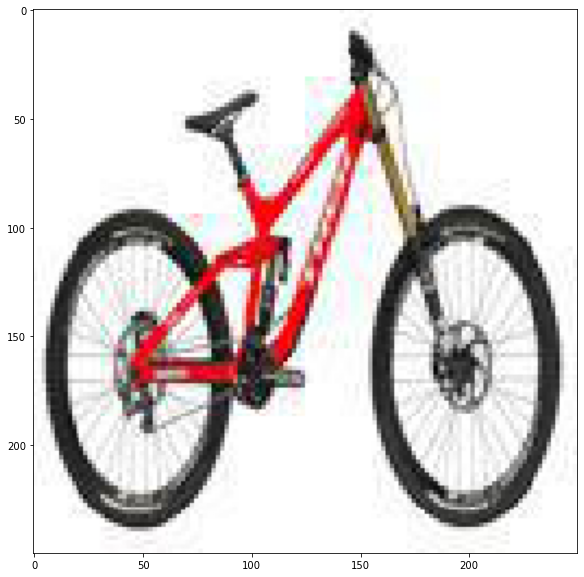

In [8]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(10,10)

plt.imshow(img_tensor[0])
plt.show()

In [9]:
def preprocess_img(img_path, target_size=200):
    from keras.preprocessing import image
    
    img = keras.utils.load_img(img_path, target_size=(target_size,target_size))
    img_tensor = keras.utils.img_to_array(img)
    
    img_tensor = np.expand_dims(img_tensor, axis=0)
    
    img_tensor /= 255.
    
    return img_tensor

In [24]:
target_size =200
margin = 3
img_seq=0

fname = 'mountain_bike_{}.jpg'.format(img_seq)
img_path = os.path.join(img_dir, fname)
img_tensor = preprocess_img(img_path,target_size)

In [25]:
img_tensor[0]

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]], dtype=float32)

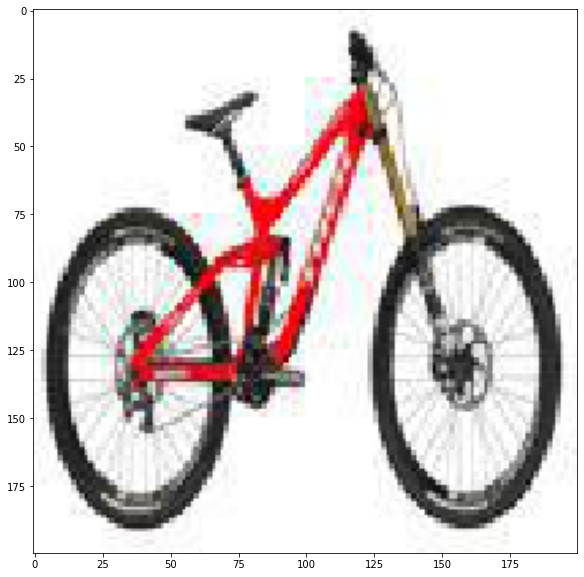

In [26]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(10,10)

plt.imshow(img_tensor[0])
plt.show()

In [16]:
n_pic = 30
n_col = 5
n_row=int(np.ceil(n_pic/n_col))

total = np.zeros((n_row*target_size+(n_row-1)*margin,n_col*target_size+(n_col-1)*margin,3))

target_size =200
margin = 3
img_seq=0

for i in range(n_row):
    for j in range(n_col):
        fname = 'mountain_bike_{}.jpg'.format(img_seq)
        img_path = os.path.join(img_dir, fname)
        img_tensor = preprocess_img(img_path,target_size)
        
        horizontal_start = i* target_size + i*margin
        horizontal_end = horizontal_start+target_size
        vertical_start = j*target_size + j*margin
        vertical_end = vertical_start + target_size
        
        
        total[horizontal_start:horizontal_end, vertical_start:vertical_end,:] = img_tensor[0]
        
        img_seq += 1
        
plt.figure(figsize=(200,200))
plt.imshow(total)
plt.show()